# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-57, 70)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 759


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"


Full_url = f"{url}appid={weather_api_key}&units=imperial"


Full_url



'https://api.openweathermap.org/data/2.5/weather?appid=3885664b2ac3d225bcd1bd218720da29&units=imperial'

In [7]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = Full_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ahau
City not found. Skipping...
Processing Record 2 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 3 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 4 of Set 1 | mount pearl
Processing Record 5 of Set 1 | coquimbo
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | mahina
Processing Record 8 of Set 1 | mao
Processing Record 9 of Set 1 | tianpeng
Processing Record 10 of Set 1 | zhezqazghan
Processing Record 11 of Set 1 | sao vicente
Processing Record 12 of Set 1 | corvallis
Processing Record 13 of Set 1 | napanee
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | korla
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | lesogorsk
Processing Record 20 of

Processing Record 34 of Set 4 | ribeira grande
Processing Record 35 of Set 4 | shimoda
Processing Record 36 of Set 4 | tindouf
Processing Record 37 of Set 4 | myeik
Processing Record 38 of Set 4 | gemena
Processing Record 39 of Set 4 | tambopata
Processing Record 40 of Set 4 | ambo
Processing Record 41 of Set 4 | lihue
Processing Record 42 of Set 4 | bredasdorp
Processing Record 43 of Set 4 | enriquillo
Processing Record 44 of Set 4 | whitehorse
Processing Record 45 of Set 4 | pimentel
Processing Record 46 of Set 4 | novaya ladoga
Processing Record 47 of Set 4 | dar naim
City not found. Skipping...
Processing Record 48 of Set 4 | abepura
Processing Record 49 of Set 4 | sao jose da coroa grande
Processing Record 0 of Set 5 | margaret river
Processing Record 1 of Set 5 | hermanus
Processing Record 2 of Set 5 | priargunsk
Processing Record 3 of Set 5 | tuy hoa
Processing Record 4 of Set 5 | bulancak
Processing Record 5 of Set 5 | hilo
Processing Record 6 of Set 5 | aldama
Processing Recor

Processing Record 24 of Set 8 | kangding
Processing Record 25 of Set 8 | sabha
Processing Record 26 of Set 8 | phalaborwa
Processing Record 27 of Set 8 | sofiyivka
Processing Record 28 of Set 8 | katsuura
Processing Record 29 of Set 8 | astaneh-ye ashrafiyeh
Processing Record 30 of Set 8 | nosy varika
Processing Record 31 of Set 8 | amga
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | sodankyla
Processing Record 34 of Set 8 | besni
Processing Record 35 of Set 8 | gaigeturi
Processing Record 36 of Set 8 | selfoss
Processing Record 37 of Set 8 | derzhavinsk
Processing Record 38 of Set 8 | masina
Processing Record 39 of Set 8 | zhicheng
Processing Record 40 of Set 8 | mahibadhoo
Processing Record 41 of Set 8 | porto novo
Processing Record 42 of Set 8 | svetlyy
Processing Record 43 of Set 8 | zelenogorsk
Processing Record 44 of Set 8 | nemuro
Processing Record 45 of Set 8 | pervomayskoye
Processing Record 46 of Set 8 | togur
Processing Record 47 of Set 8 | general ach

Processing Record 17 of Set 12 | kish
Processing Record 18 of Set 12 | scottburgh
Processing Record 19 of Set 12 | oyem
Processing Record 20 of Set 12 | tsiombe
Processing Record 21 of Set 12 | kodinsk
Processing Record 22 of Set 12 | kashgar
Processing Record 23 of Set 12 | shahrud
Processing Record 24 of Set 12 | zuwarah
Processing Record 25 of Set 12 | hilton
Processing Record 26 of Set 12 | plouzane
Processing Record 27 of Set 12 | galliano
Processing Record 28 of Set 12 | graaff-reinet
Processing Record 29 of Set 12 | masterton
Processing Record 30 of Set 12 | franceville
Processing Record 31 of Set 12 | jamaame
Processing Record 32 of Set 12 | misawa
Processing Record 33 of Set 12 | sydney
Processing Record 34 of Set 12 | jalalabad
Processing Record 35 of Set 12 | dubbo
Processing Record 36 of Set 12 | muar
Processing Record 37 of Set 12 | copala
Processing Record 38 of Set 12 | al mijlad
Processing Record 39 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 40 o

City not found. Skipping...
Processing Record 3 of Set 16 | buala
Processing Record 4 of Set 16 | pipili
Processing Record 5 of Set 16 | kupang
Processing Record 6 of Set 16 | rechka-vydrino
Processing Record 7 of Set 16 | griffith
Processing Record 8 of Set 16 | amboanjo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          718
Lat           718
Lng           718
Max Temp      718
Humidity      718
Cloudiness    718
Wind Speed    718
Country       718
Date          718
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount pearl,47.5166,-52.7813,61.32,80,100,11.50,CA,1691603004
1,coquimbo,-29.9533,-71.3436,60.53,77,75,8.05,CL,1691602995
2,waitangi,-43.9535,-176.5597,47.82,83,34,5.99,NZ,1691603005
3,mahina,-17.5065,-149.4890,73.17,83,20,1.14,PF,1691602942
4,mao,39.8885,4.2658,81.16,69,0,8.05,ES,1691603005


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,61.32,80,100,11.50,CA,1691603004
1,coquimbo,-29.9533,-71.3436,60.53,77,75,8.05,CL,1691602995
2,waitangi,-43.9535,-176.5597,47.82,83,34,5.99,NZ,1691603005
3,mahina,-17.5065,-149.4890,73.17,83,20,1.14,PF,1691602942
4,mao,39.8885,4.2658,81.16,69,0,8.05,ES,1691603005


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

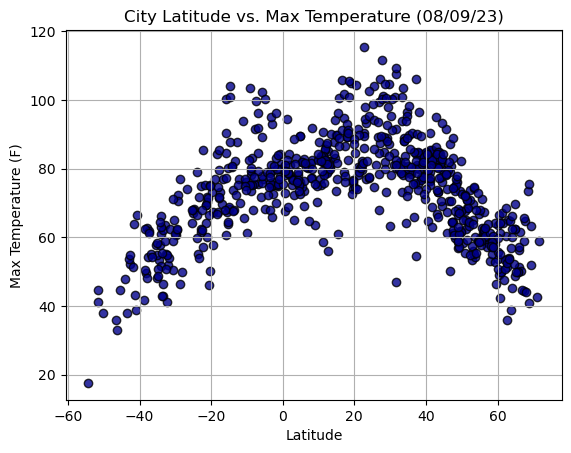

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", color="darkblue",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

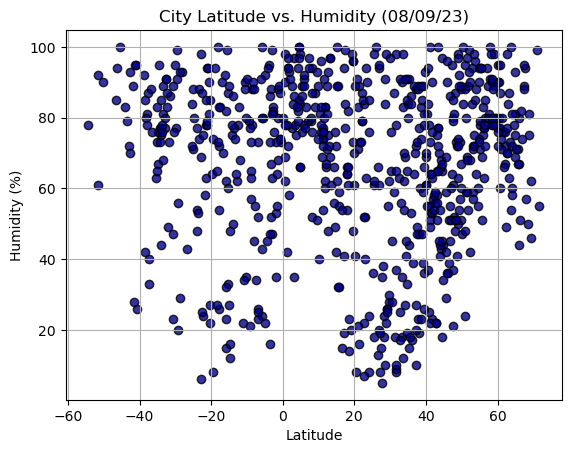

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", color="darkblue",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("LatitudVsHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

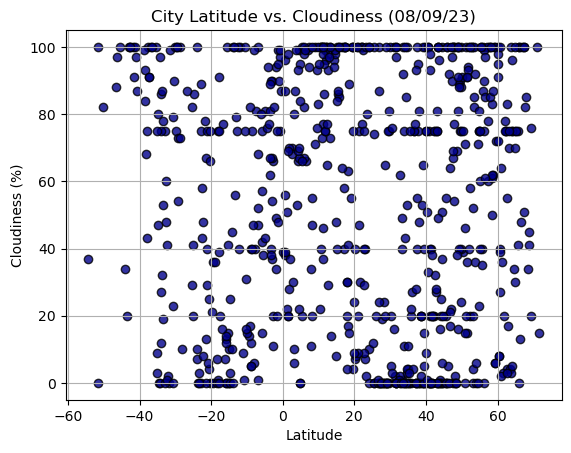

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", color="darkblue",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

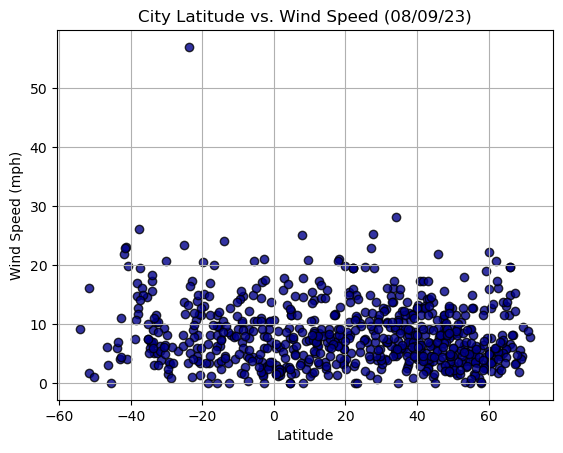

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",color="darkblue",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("LatitudVsWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,61.32,80,100,11.50,CA,1691603004
4,mao,39.8885,4.2658,81.16,69,0,8.05,ES,1691603005
5,tianpeng,30.9866,103.9393,84.67,87,100,4.05,CN,1691603007
6,zhezqazghan,47.7833,67.7667,74.66,52,54,10.00,KZ,1691603007
8,corvallis,44.5646,-123.2620,76.24,65,51,1.01,US,1691602648


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,coquimbo,-29.9533,-71.3436,60.53,77,75,8.05,CL,1691602995
2,waitangi,-43.9535,-176.5597,47.82,83,34,5.99,NZ,1691603005
3,mahina,-17.5065,-149.4890,73.17,83,20,1.14,PF,1691602942
7,sao vicente,-23.9631,-46.3919,78.98,54,100,3.44,BR,1691602872
10,hithadhoo,-0.6000,73.0833,81.45,73,87,3.47,MV,1691603008


###  Temperature vs. Latitude Linear Regression Plot

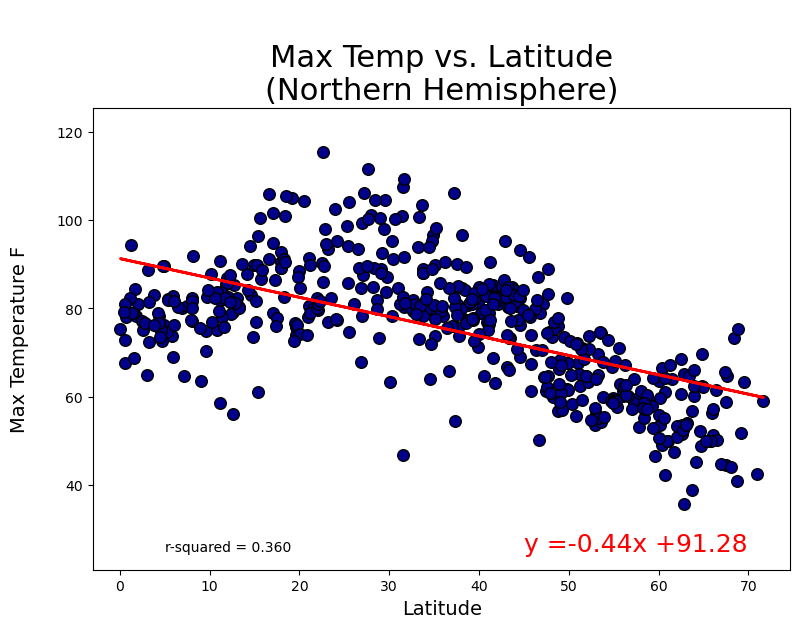

In [58]:
# Linear regression on Northern Hemisphere



plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", color="darkblue", s=[70], edgecolors="black")
plt.plot(x_values,regress_values, "red", linewidth=2)

plt.title("\nMax Temp vs. Latitude\n(Northern Hemisphere)", fontsize=22)
plt.ylabel("Max Temperature F\n", fontsize=14, color="black")
plt.xlabel("Latitude", fontsize=14, color="black")

plt.annotate(line_eq,(45,25), fontsize=18, color="red")
plt.annotate("r-squared = {:.3f}".format(round(rvalue**2,2)), (5, 25))




plt.ylim(min(northern_hemi_df["Max Temp"])-15, max(northern_hemi_df["Max Temp"])+10)


plt.xlim(-3, max(northern_hemi_df["Lat"])+3)


# Save the figure:
plt.savefig("MaxTempVsLatitud_Northern_Regression.png")

# Show plot:
plt.show()




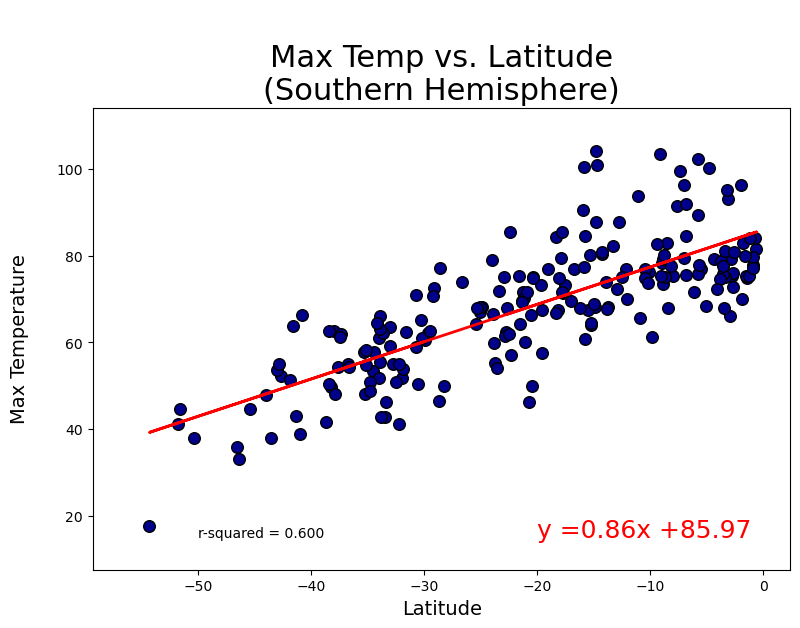

In [59]:
# Linear regression on Southern Hemisphere

plt.figure(figsize=(9,6))
x_values1 = southern_hemi_df["Lat"]
y_values1 = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope + intercept

line_eq1 = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values1,y_values1, marker="o", color="darkblue", s=[70], edgecolors="black")
plt.plot(x_values1,regress_values1, "red", linewidth=2)

plt.title("\nMax Temp vs. Latitude\n(Southern Hemisphere)", fontsize=22)
plt.ylabel("Max Temperature\n", fontsize=14, color="black")
plt.xlabel("Latitude", fontsize=14, color="black")

plt.annotate(line_eq1,(-20, 15), fontsize=18, color="red")
plt.annotate("r-squared = {:.3f}".format(round(rvalue**2,2)), (-50, 15))




plt.ylim(min(southern_hemi_df["Max Temp"])-10, max(southern_hemi_df["Max Temp"])+10)


plt.xlim(min(southern_hemi_df["Lat"]-5), max(southern_hemi_df["Lat"])+3)


# Save the figure:
plt.savefig("MaxTempVsLatitud_Southern_Regression.png")

# Show plot:
plt.show()






**Discussion about the linear relationship:** with this 2 examples we can see how the closest to latitude 0 temperatures increases, and we can see this in many ways, analyzing the lineal regression function, northern hemisphere the slope is negative and southern hemisphere is positive for each increase in our independent variable x "Latitude". 
We may say that R^2 in the northern hemisphere is low, because these temperatures have been captured recently(aug,2023), and the Maximum in this season has been above average and fluctuations are just like weather now, abnormal. 

While in the southern hemisphere R^2 its pretty good, and for same reasons above, and adding that the summer solstice creates fluctuations in less degrees than the northern hemisphere.

The model is not perfect because weather is not lineal, but it shows how related are Temperatures and Latitude in a Visual way, through Data.


### Humidity vs. Latitude Linear Regression Plot

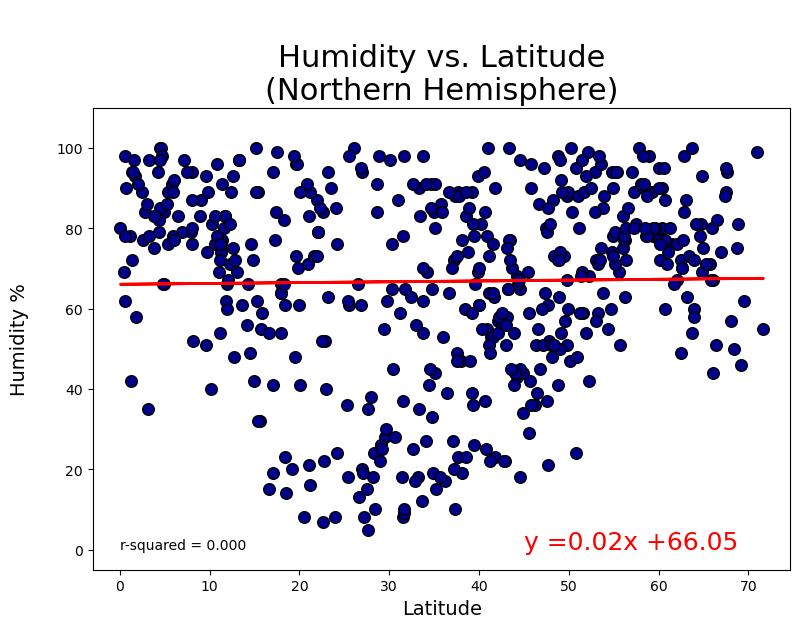

In [60]:
# Northern Hemisphere

plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", color="darkblue", s=[70], edgecolors="black")
plt.plot(x_values,regress_values, "red", linewidth=2)

plt.title("\nHumidity vs. Latitude\n(Northern Hemisphere)", fontsize=22)
plt.ylabel("Humidity %\n", fontsize=14, color="black")
plt.xlabel("Latitude", fontsize=14, color="black")

plt.annotate(line_eq,(45, 0), fontsize=18, color="red")
plt.annotate("r-squared = {:.3f}".format(round(rvalue**2,2)), (0, 0))




plt.ylim(min(northern_hemi_df["Humidity"])-10, max(northern_hemi_df["Humidity"])+10)


plt.xlim(-3, max(northern_hemi_df["Lat"])+3)


# Save the figure:
plt.savefig("HumidityVsLatitud_Northern_Regression.png")

# Show plot:
plt.show()


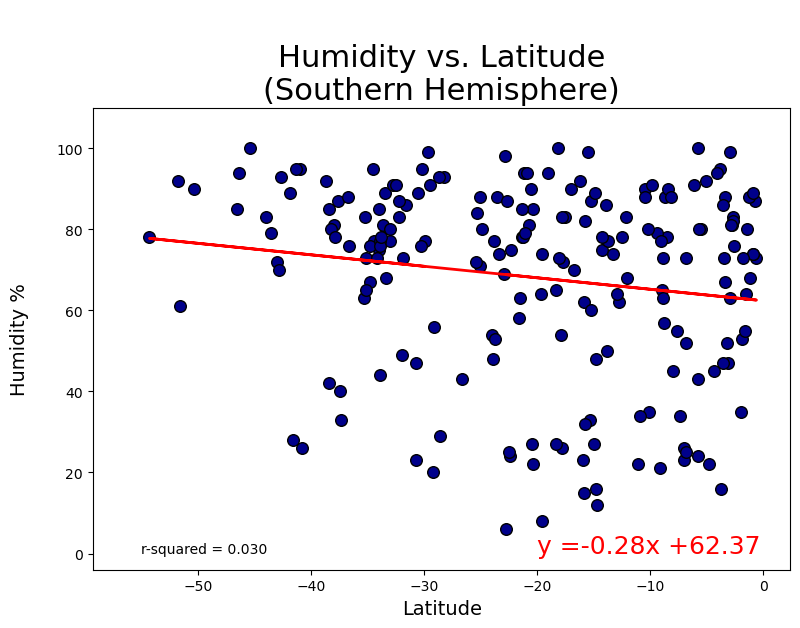

In [61]:
# Southern Hemisphere


plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", color="darkblue", s=[70], edgecolors="black")
plt.plot(x_values,regress_values, "red", linewidth=2)

plt.title("\nHumidity vs. Latitude\n(Southern Hemisphere)", fontsize=22)
plt.ylabel("Humidity %\n", fontsize=14, color="black")
plt.xlabel("Latitude", fontsize=14, color="black")

plt.annotate(line_eq,(-20, 0), fontsize=18, color="red")
plt.annotate("r-squared = {:.3f}".format(round(rvalue**2,2)), (-55, 0))




plt.ylim(min(southern_hemi_df["Humidity"])-10, max(southern_hemi_df["Humidity"])+10)


plt.xlim(min(southern_hemi_df["Lat"]-5), max(southern_hemi_df["Lat"])+3)


# Save the figure:
plt.savefig("HumidityVsLatitud_Southern_Regression.png")

# Show plot:
plt.show()


**Discussion about the linear relationship:** Wit this Data sample and Variables Lineal Regression does not show a proper model behavior , we can make deductions about Summer Solstice and the Sun creating more humidity in norther latitudes, but humidity is not dependent just in Latitude but other factors. That's why we can appreciate the R^2 on both being really low.

### Cloudiness vs. Latitude Linear Regression Plot

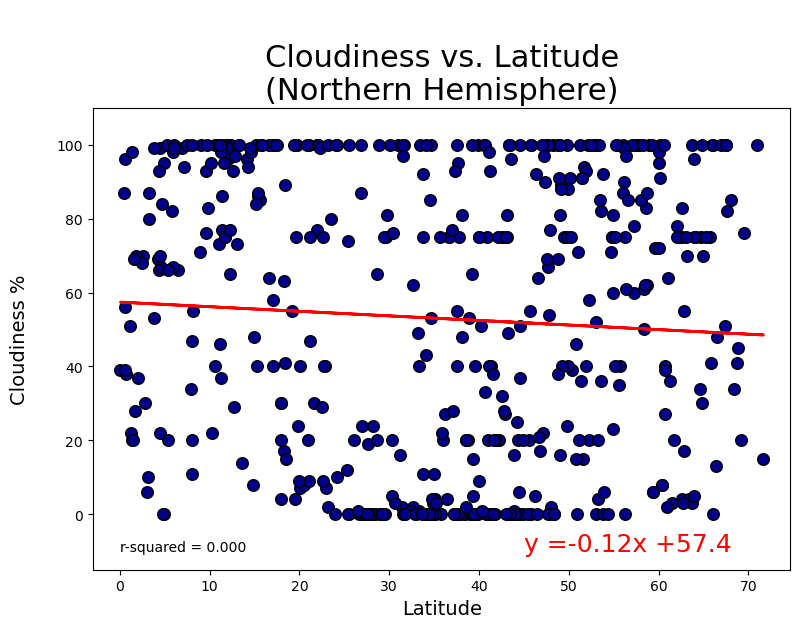

In [62]:
# Northern Hemisphere

plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", color="darkblue", s=[70], edgecolors="black")
plt.plot(x_values,regress_values, "red", linewidth=2)

plt.title("\nCloudiness vs. Latitude\n(Northern Hemisphere)", fontsize=22)
plt.ylabel("Cloudiness %\n", fontsize=14, color="black")
plt.xlabel("Latitude", fontsize=14, color="black")

plt.annotate(line_eq,(45, -10), fontsize=18, color="red")
plt.annotate("r-squared = {:.3f}".format(round(rvalue**2,2)), (0, -10))




plt.ylim(min(northern_hemi_df["Cloudiness"])-15, max(northern_hemi_df["Cloudiness"])+10)


plt.xlim(-3, max(northern_hemi_df["Lat"])+3)


# Save the figure:
plt.savefig("CloudinessVsLatitud_Northern_Regression.png")

# Show plot:
plt.show()


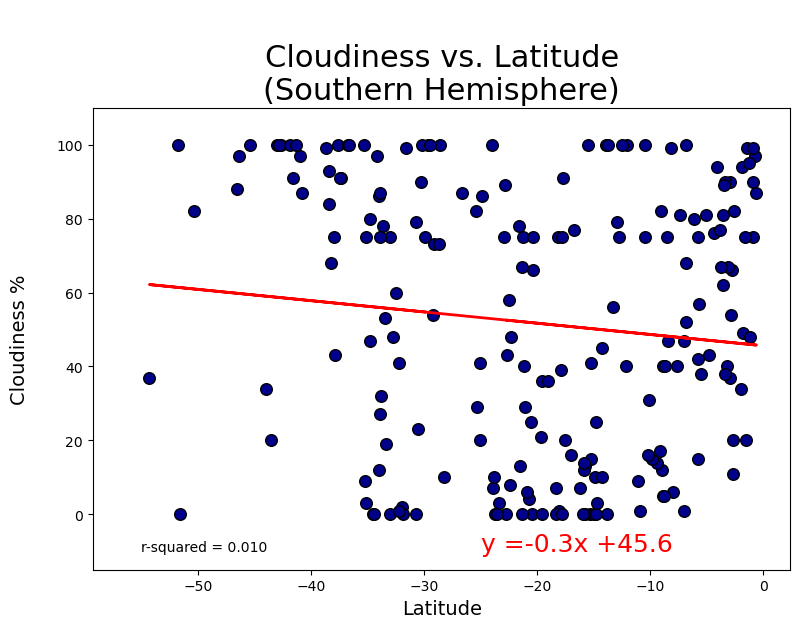

In [63]:
# Southern Hemisphere

plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", color="darkblue", s=[70], edgecolors="black")
plt.plot(x_values,regress_values, "red", linewidth=2)

plt.title("\nCloudiness vs. Latitude\n(Southern Hemisphere)", fontsize=22)
plt.ylabel("Cloudiness %\n", fontsize=14, color="black")
plt.xlabel("Latitude", fontsize=14, color="black")

plt.annotate(line_eq,(-25, -10), fontsize=18, color="red")
plt.annotate("r-squared = {:.3f}".format(round(rvalue**2,2)), (-55, -10))




plt.ylim(min(southern_hemi_df["Cloudiness"])-15, max(southern_hemi_df["Cloudiness"])+10)


plt.xlim(min(southern_hemi_df["Lat"]-5), max(southern_hemi_df["Lat"])+3)


# Save the figure:
plt.savefig("CloudinessVsLatitud_Southern_Regression.png")

# Show plot:
plt.show()


**Discussion about the linear relationship:** Again here we have a case where R^2 is minimum, and the regression lineal equation  in respect with the data shows no relation between the Cloudiness for any change in the Latitude .

### Wind Speed vs. Latitude Linear Regression Plot

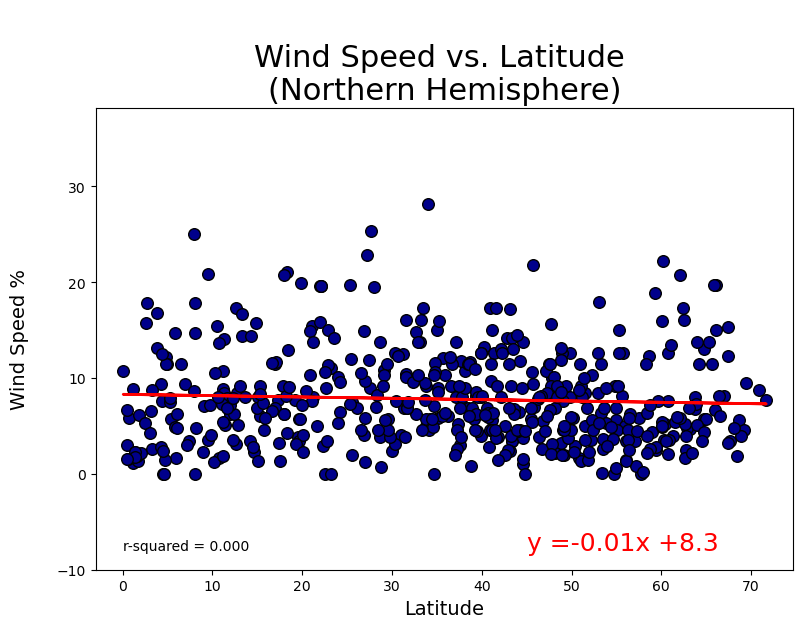

In [64]:
# Northern Hemisphere


plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", color="darkblue", s=[70], edgecolors="black")
plt.plot(x_values,regress_values, "red", linewidth=2)

plt.title("\nWind Speed vs. Latitude \n(Northern Hemisphere)", fontsize=22)
plt.ylabel("Wind Speed %\n", fontsize=14, color="black")
plt.xlabel("Latitude", fontsize=14, color="black")

plt.annotate(line_eq,(45, -8), fontsize=18, color="red")
plt.annotate("r-squared = {:.3f}".format(round(rvalue**2,2)), (0, -8))




plt.ylim(min(northern_hemi_df["Wind Speed"])-10, max(northern_hemi_df["Wind Speed"])+10)


plt.xlim(-3, max(northern_hemi_df["Lat"])+3)


# Save the figure:
plt.savefig("WindSpeedVsLatitud_Northern_Regression.png")

# Show plot:
plt.show()

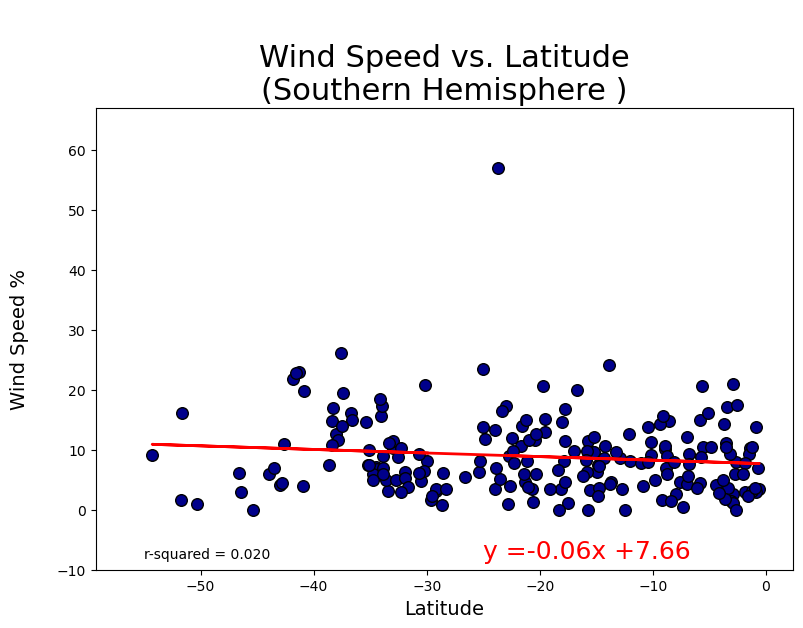

In [65]:
# Southern Hemisphere

plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", color="darkblue", s=[70], edgecolors="black")
plt.plot(x_values,regress_values, "red", linewidth=2)

plt.title("\nWind Speed vs. Latitude\n(Southern Hemisphere )", fontsize=22)
plt.ylabel("Wind Speed %\n", fontsize=14, color="black")
plt.xlabel("Latitude", fontsize=14, color="black")

plt.annotate(line_eq,(-25, -8), fontsize=18, color="red")
plt.annotate("r-squared = {:.3f}".format(round(rvalue**2,2)), (-55, -8))




plt.ylim(min(southern_hemi_df["Wind Speed"])-10, max(southern_hemi_df["Wind Speed"])+10)


plt.xlim(min(southern_hemi_df["Lat"]-5), max(southern_hemi_df["Lat"])+3)


# Save the figure:
plt.savefig("WindSpeedVsLatitud_Southern_Regression.png")

# Show plot:
plt.show()


**Discussion about the linear relationship:** we can see again that this 2 variables are not related, even when it shows lineal spread of data with a wide band of errors, it may be because the countries generated randomly are well distributed into the Latitudes. But more Variables has to be consider in order to have a more concrete conclusion.